# <center> <img src="figs/LogoUFSCar.jpg" alt="Logo UFScar" width="110" align="left"/>  <br/> <center>Universidade Federal de São Carlos (UFSCar)<br/><font size="4"> Departamento de Computação, campus Sorocaba</center></font>
</p>

<font size="4"><center><b>Disciplina: Aprendizado de Máquina</b></center></font>
  
<font size="3"><center>Prof. Dr. Tiago A. Almeida</center></font>

## <center>Projeto Final</center>

**Nome**:

**RA**: 


---
### Análise exploratória

Nesta seção, deve ser feita a leitura da base de dados e todas as análises necessárias para interpretar e analisar os dados, tais como:
* Significado de cada atributo
* Medidas descritivas
* Gráficos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scripts.analise_exploratoria import *
from scripts.preprocessamento import *

In [2]:
# mostrar todas as colunas
pd.set_option("display.max_columns", None)

In [3]:
train_data = pd.read_csv("./data/train.csv")
data = pd.read_csv("./data/RHP_data.csv")

train_data = data.merge(train_data, on="Id", how="right")


In [24]:
train_data.head(5)

,Id,Peso,Altura,IMC,IDADE,PULSOS,PA SISTOLICA,PA DIASTOLICA,PPA,B2,SOPRO,FC,HDA 1,HDA2,SEXO,MOTIVO1,MOTIVO2,CLASSE
0,10524,28.0,123,19.0,5.79,Normais,110.0,80.0,HAS-1 PAD,Normal,ausente,100.0,Palpitacao,NaN,M,6 - Suspeita de cardiopatia,6 - Palpitação/taquicardia/arritmia,Normal
2,4483,13.0,87,17.0,2.21,Normais,NaN,NaN,Não Calculado,Normal,Sistólico,100.0,Assintomático,NaN,M,6 - Suspeita de cardiopatia,6 - Sopro,Anormal
5,15430,45.0,161,17.0,7.60,Normais,120.0,70.0,HAS-1 PAS,Normal,ausente,80.0,Assintomático,NaN,M,5 - Parecer cardiológico,5 - Cirurgia,Normal
6,1023,18.5,105,17.0,3.93,Normais,90.0,60.0,Normal,Normal,ausente,92.0,NaN,NaN,F,7 - Outro,Outro,Normal
8,14309,24.0,112,19.0,5.27,Normais,100.0,60.0,Normal,Normal,ausente,100.0,Outro,NaN,M,6 - Suspeita de cardiopatia,6 - HAS/dislipidemia/obesidade,Normal


#### Após carregas os dados, iremos fazer uma breve análise do que cada uma das colunas representa.

* Peso: representa o peso, em Kg, de cada indivíduo.

* Altura: representa a altura, em cm, de cada indivíduo.

* IMC: representa o índice de massa corporal do paciente, índice que representa se o paciente estáem seu peso ideal ou não. É calculado pelo peso (em metros) dividido pela altura elevada ao quadrado.

* Atendimento: indica a data em que foi feito o atendimento do paciente.

* DN: data em que a declaração de nascido vivo do paciente foi escrita.

* Idade: representa a idade do paciente, sendo os anos representados por um valor real.

* Convênio: Indica qual o convênio do cliente.

* Pulsos: Indica a qualidade da circulação arterial. Pulsos fracos ou ausentes podem sugerir problemas como obstrução arterial ou insuficiência cardíaca.

* PA Sistolica: valor mais alto (medido em mmHg) que aparece durante uma aferição de pressão. Representa a pressão exercida nas artérias durante a contração do coração (sístole). Valores elevados indicam hipertensão arterial, enquanto valores muito baixos podem sugerir hipotensão.

* PA Diastolica: valor mais baixo (medido em mmHg) que aparece durante uma aferição de pressão. Reflete a pressão arterial durante o relaxamento do coração (diástole). É usada junto com a PA sistólica para diagnosticar hipertensão.

* PPA (Pressão de Pulso Arterial): Diferença entre a pressão arterial sistólica e diastólica. Indica a rigidez arterial. Valores elevados podem estar associados a doenças cardiovasculares.

* B2: Segundo Ruído Cardíaco, representa o som do fechamento das válvulas aórtica e pulmonar. 

* Sopro: Presença de ruídos anormais detectados durante a ausculta cardíaca. 

* FC (Frequência Cardíaca): número de batimentos cardíacos por minuto (bpm). Frequências muito altas (taquicardia) ou baixas (bradicardia) podem indicar problemas cardíacos.

* HDA1 (Histórico de doenças atual 1): informações detalhadas sobre o principal problema clínico atual.

* HDA2 (Histórico de doenças atual 2): informações adicionais sobre o problema clínico ou outras condições associadas.

* Sexo: genêro biológico do paciente.

* Motivo 1: principal razão para a consulta.

* Motivo 2: razão secundária para a consulta.

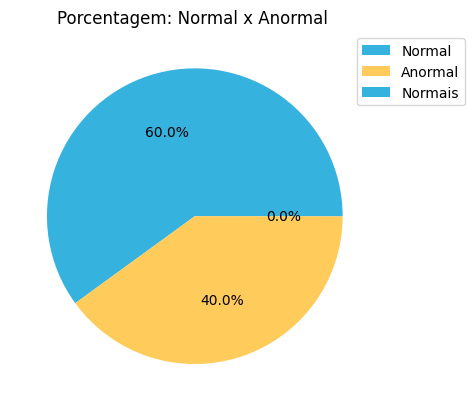

In [4]:

colors = ["#35b2de", "#ffcb5a"]  # Apenas escolhando as cores

labels = train_data["CLASSE"].value_counts().index
plt.pie(
    train_data["CLASSE"].value_counts(), autopct="%1.1f%%", colors=colors
)  # conta as ocorrências de cada classe e exibe a porcentagem
plt.legend(
    labels,
    bbox_to_anchor=(1.25, 1),
)  # Nossas Legendas
plt.title("Porcentagem: Normal x Anormal ")
plt.show()

In [5]:
print(f"Quantidade de amostras Normais: {sum(train_data['CLASSE'] == 'Normal')}")
print(f"Quantidade de amostras Anormais: {sum(train_data['CLASSE'] == 'Anormal')}")

Quantidade de amostras Normais: 8137
Quantidade de amostras Anormais: 5421


---
### Pré-processamento

Nesta seção, as funções da etapa de pré-processamento dos dados devem ser implementadas e aplicadas (se necessário).

In [6]:
substituir(train_data, "CLASSE", "Normais", "Normal")

In [7]:
normal_data = train_data[train_data["CLASSE"] == "Normal"]

In [8]:
normal_data["nan_count"] = normal_data.isna().sum(axis=1)
normal_data = normal_data.sort_values(by="nan_count", ascending=False)

C:\Users\PICHAU\AppData\Local\Temp\ipykernel_6492\3752332633.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normal_data["nan_count"] = normal_data.isna().sum(axis=1)


In [9]:
normal_data_reduced = normal_data.iloc[0:2716,:]

In [10]:
train_data = train_data[~train_data["Id"].isin(normal_data_reduced["Id"])]

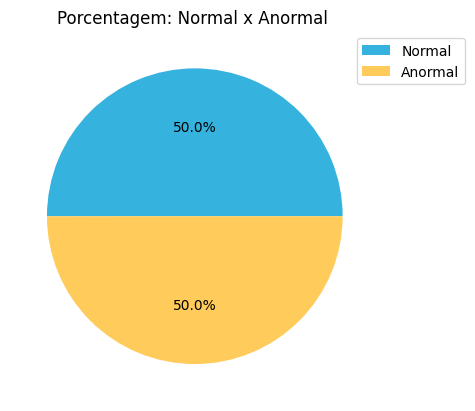

In [11]:
colors = ["#35b2de", "#ffcb5a"]  # Apenas escolhando as cores

labels = train_data["CLASSE"].value_counts().index
plt.pie(
    train_data["CLASSE"].value_counts(), autopct="%1.1f%%", colors=colors
)  # conta as ocorrências de cada classe e exibe a porcentagem
plt.legend(
    labels,
    bbox_to_anchor=(1.25, 1),
)  # Nossas Legendas
plt.title("Porcentagem: Normal x Anormal ")
plt.show()

In [12]:
train_data = train_data.drop(columns=["Atendimento", "DN", "Convenio"])

In [13]:
converter_numeric(train_data, "FC")
converter_numeric(train_data, "IDADE")

In [14]:
peso_invalido = train_data[train_data["Peso"] < 0] 
print(len(peso_invalido))

train_data = train_data.drop(peso_invalido.index)

0


In [15]:
altura_invalida = train_data[train_data["Altura"] < 40]
print(len(altura_invalida))

train_data = train_data.drop(altura_invalida.index)

2755


In [16]:
idade_invalida = train_data[(train_data["IDADE"] <= 0) | (train_data["IDADE"] > 19)]
print(len(idade_invalida))
train_data = train_data.drop(idade_invalida.index)

233


In [17]:
pa_sistolica_invalida = train_data[
    (train_data["PA SISTOLICA"] > 500) | (train_data["PA SISTOLICA"] < 40)
]

train_data = train_data.drop(pa_sistolica_invalida.index)

In [18]:
pa_diastolica_irreal = train_data[train_data["PA DIASTOLICA"] < 30]

train_data = train_data.drop(pa_diastolica_irreal.index)

In [20]:
fc_irreal = train_data[(train_data["FC"] > 220) | (train_data["FC"] < 60)]

train_data = train_data.drop(fc_irreal.index)

In [21]:
colunas_numericas = ["Peso", "Altura", "IDADE"]

# Primeiro usa a função para retornar todas as amostras que são outliners
outliners = identifica_outliners(train_data, colunas_numericas)

In [22]:
outliners

0        False
2        False
5        False
6        False
8        False
         ...  
14718    False
14719    False
14721    False
14723    False
14724    False
Length: 8989, dtype: bool

In [105]:
train_data = train_data.drop(outliners[outliners].index)

In [106]:
train_data["PA DIASTOLICA"] = fill_na_mediana(train_data, "PA DIASTOLICA")
train_data["PA SISTOLICA"] = fill_na_mediana(train_data, "PA SISTOLICA")
train_data["FC"] = fill_na_mediana(train_data, "FC")

In [107]:
train_data["Peso"] = fill_na_mediana(train_data, "Peso")
train_data["Altura"] = fill_na_mediana(train_data, "Altura")
train_data["IDADE"] = fill_na_mediana(train_data, "IDADE")

In [108]:
altura_aux = train_data["Altura"] / 100


train_data["IMC"] = train_data["Peso"] / np.power(altura_aux, 2)

In [109]:
substituir(train_data, "PULSOS", "NORMAIS", "Normais")
substituir(train_data, "PULSOS", "AMPLOS", "Amplos")

In [110]:
substituir(train_data, "SOPRO", "sistólico", "Sistólico")
substituir(train_data, "SOPRO", "contínuo", "Contínuo")

In [111]:
substituir(train_data, "SEXO", "Masculino", "M")
substituir(train_data, "SEXO", "masculino", "M")

substituir(train_data, "SEXO", "Feminino", "F")

In [112]:
train_data = train_data.dropna(subset=["PULSOS"])

In [113]:
train_data = train_data.dropna(subset=["B2"])

In [114]:
train_data = train_data.dropna(subset=["HDA 1"])

In [115]:
train_data["HDA2"] = train_data["HDA2"].fillna("Assintomático")

In [116]:
train_data = train_data.dropna(subset=["SEXO"])

In [117]:
train_data = train_data.dropna(subset=["MOTIVO1"])

In [118]:
train_data["MOTIVO2"] = train_data["MOTIVO2"].fillna(train_data['MOTIVO2'].mode()[0])

In [119]:
train_data["PPA"] = train_data["PPA"].replace("#VALUE!", np.nan)

In [120]:
train_data = train_data.dropna(subset=["PPA"])

In [121]:
train_data = train_data.dropna(subset=["CLASSE"])

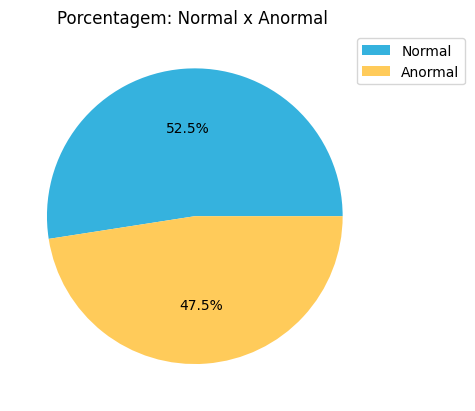

In [122]:
colors = ["#35b2de", "#ffcb5a"]  # Apenas escolhando as cores

labels = train_data["CLASSE"].value_counts().index
plt.pie(
    train_data["CLASSE"].value_counts(), autopct="%1.1f%%", colors=colors
)  # conta as ocorrências de cada classe e exibe a porcentagem
plt.legend(
    labels,
    bbox_to_anchor=(1.25, 1),
)  # Nossas Legendas
plt.title("Porcentagem: Normal x Anormal ")
plt.show()

#### Dados teste

In [123]:
test_data = pd.read_csv("./data/test.csv")
data2 = pd.read_csv("./data/RHP_data.csv")

test_data = data2.merge(test_data, on="Id", how="right")


In [124]:
converter_numeric(test_data, "FC")
converter_numeric(test_data, "IDADE")

In [125]:
test_data["PA DIASTOLICA"] = fill_na_mediana(test_data, "PA DIASTOLICA")
test_data["PA SISTOLICA"] = fill_na_mediana(test_data, "PA SISTOLICA")
test_data["FC"] = fill_na_mediana(test_data, "FC")

In [126]:
test_data["Peso"] = fill_na_mediana(test_data, "Peso")
test_data["Altura"] = fill_na_mediana(test_data, "Altura")
test_data["IDADE"] = fill_na_mediana(test_data, "IDADE")

In [127]:
test_data["Peso"] = test_data["Peso"].replace(0, test_data["Peso"].median())

In [128]:
test_data["Altura"] = test_data["Altura"].replace(0, test_data["Altura"].median())

In [129]:
altura_invalida = test_data[test_data["Altura"] < 50]

test_data.loc[altura_invalida.index, "Altura"] = test_data["Altura"].median()

In [130]:
altura_aux = test_data["Altura"] / 100


test_data["IMC"] = test_data["Peso"] / np.power(altura_aux, 2)

In [131]:
test_data = test_data.drop(columns=["Atendimento", "DN", "Convenio"])

In [132]:
substituir(test_data, "PULSOS", "NORMAIS", "Normais")
substituir(test_data, "PULSOS", "AMPLOS", "Amplos")

In [133]:
substituir(test_data, "SOPRO", "sistólico", "Sistólico")
substituir(test_data, "SOPRO", "contínuo", "Contínuo")

In [134]:
substituir(test_data, "SEXO", "Masculino", "M")
substituir(test_data, "SEXO", "masculino", "M")

substituir(test_data, "SEXO", "Feminino", "F")

In [135]:
test_data["PULSOS"] = test_data["PULSOS"].fillna(test_data["PULSOS"].mode()[0])

In [136]:
test_data["B2"] = test_data["B2"].fillna(test_data["B2"].mode()[0])

In [137]:
test_data["SOPRO"] = test_data["SOPRO"].fillna(test_data["SOPRO"].mode()[0])

In [138]:
test_data["SEXO"] = test_data["SEXO"].fillna(test_data["SEXO"].mode()[0])

In [139]:
test_data["MOTIVO1"] = test_data["MOTIVO1"].fillna(test_data["MOTIVO1"].mode()[0])
test_data["MOTIVO2"] = test_data["MOTIVO2"].fillna(test_data["MOTIVO2"].mode()[0])

In [140]:
test_data["PPA"] = test_data["PPA"].replace("#VALUE!", np.nan)
test_data["PPA"] = test_data["PPA"].fillna(test_data["PPA"].mode()[0])

In [141]:
test_data["HDA 1"] = test_data["HDA 1"].fillna("Assintomático")
test_data["HDA2"] = test_data["HDA2"].fillna("Assintomático")

#### Encoder

In [142]:
from sklearn.preprocessing import LabelEncoder

In [143]:
colunas = [
    "PULSOS",
    "PPA",
    "B2",
    "SOPRO",
    "HDA 1",
    "HDA2",
    "SEXO",
    "MOTIVO1",
    "MOTIVO2",
    "CLASSE",
]

In [144]:
encoders_train = {}
for col in colunas:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col])
    encoders_train[col] = le  # Armazenar o LabelEncoder para cada coluna

In [145]:
for col, encoder in encoders_train.items():
    print(f"Coluna: {col}")
    # O mapeamento entre as categorias e os números atribuídos
    mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
    print(mapping)
    print("-" * 30)

Coluna: PULSOS
{'Amplos': np.int64(0), 'Femorais diminuidos': np.int64(1), 'Normais': np.int64(2), 'Outro': np.int64(3)}
------------------------------
Coluna: PPA
{'HAS-1 PAD': np.int64(0), 'HAS-1 PAS': np.int64(1), 'HAS-2 PAD': np.int64(2), 'HAS-2 PAS': np.int64(3), 'Normal': np.int64(4), 'Não Calculado': np.int64(5), 'Pre-Hipertensão PAD': np.int64(6), 'Pre-Hipertensão PAS': np.int64(7)}
------------------------------
Coluna: B2
{'Desdob fixo': np.int64(0), 'Hiperfonética': np.int64(1), 'Normal': np.int64(2), 'Outro': np.int64(3), 'Única': np.int64(4)}
------------------------------
Coluna: SOPRO
{'Contínuo': np.int64(0), 'Sistólico': np.int64(1), 'ausente': np.int64(2), 'diastólico': np.int64(3)}
------------------------------
Coluna: HDA 1
{'Assintomático': np.int64(0), 'Cianose': np.int64(1), 'Desmaio/tontura': np.int64(2), 'Dispneia': np.int64(3), 'Dor precordial': np.int64(4), 'Ganho de peso': np.int64(5), 'Outro': np.int64(6), 'Palpitacao': np.int64(7)}
-----------------------

In [146]:
encoders_test = {}
for col in colunas[:-1]:
    le = LabelEncoder()
    test_data[col] = le.fit_transform(test_data[col])
    encoders_test[col] = le

#### Normalização

In [147]:
from sklearn.preprocessing import StandardScaler

In [148]:
dados = pd.concat([train_data, test_data], axis=0)

ids = dados["Id"].to_numpy()
classes = dados["CLASSE"].to_numpy()

In [149]:
dados = dados.drop(columns=["Id", "CLASSE"])

In [150]:
scaler = StandardScaler()
dados_normalizados = pd.DataFrame(scaler.fit_transform(dados), columns=dados.columns)

#### K means

In [151]:
from sklearn.cluster import KMeans

In [152]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(dados_normalizados)

KMeans(n_clusters=2, random_state=42)

In [153]:
rotulos = kmeans.labels_
centroides = kmeans.cluster_centers_

In [154]:
dados_normalizados["CLUSTER"] = rotulos

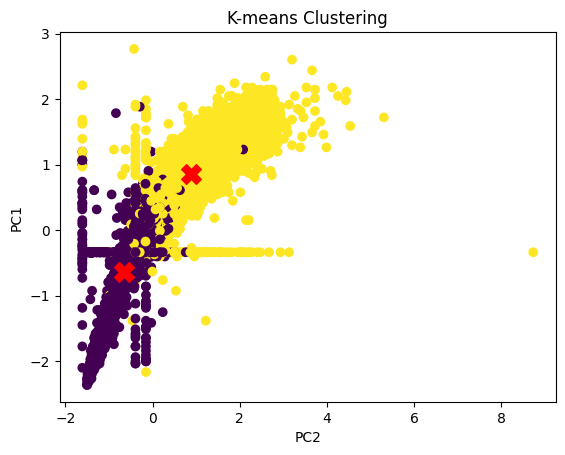

In [155]:
plt.scatter(
    dados_normalizados["Peso"],
    dados_normalizados["Altura"],
    c=dados_normalizados["CLUSTER"],
    cmap="viridis",
)
plt.scatter(centroides[:, 0], centroides[:, 1], s=200, c="red", marker="X")
plt.xlabel("PC2")
plt.ylabel("PC1")
plt.title("K-means Clustering")
plt.show()

In [156]:
dados_normalizados["Id"] = ids
dados_normalizados["CLASSE"] = classes

#### Separação para treinamento

In [157]:
X = train_data.iloc[:, 1:-1]

y = train_data.iloc[:, -1]

X_test = test_data.iloc[:, 1:]

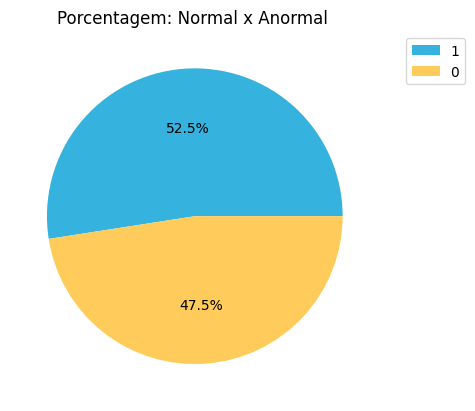

In [158]:
colors = ["#35b2de", "#ffcb5a"]  # Apenas escolhando as cores

labels = train_data["CLASSE"].value_counts().index
plt.pie(
    train_data["CLASSE"].value_counts(), autopct="%1.1f%%", colors=colors
)  # conta as ocorrências de cada classe e exibe a porcentagem
plt.legend(
    labels,
    bbox_to_anchor=(1.25, 1),
)  # Nossas Legendas
plt.title("Porcentagem: Normal x Anormal ")
plt.show()

In [159]:
X_train = pd.DataFrame(train_data["Id"])

X_train = dados_normalizados[dados_normalizados["Id"].isin(X_train["Id"])]

In [160]:
X_test = pd.DataFrame(test_data["Id"])

X_test = dados_normalizados[dados_normalizados["Id"].isin(X_test["Id"])]

In [161]:
y = X_train["CLASSE"]
X = X_train.drop(columns=["Id", "CLASSE"])
X_t = X_test.drop(columns=["Id", "CLASSE"])

In [162]:
X

,Peso,Altura,IMC,IDADE,PULSOS,PA SISTOLICA,PA DIASTOLICA,PPA,B2,SOPRO,FC,HDA 1,HDA2,SEXO,MOTIVO1,MOTIVO2,CLUSTER
0,0.233915,0.347929,0.160210,-0.135829,-0.658274,0.935871,2.785610,-5.217504,0.09845,0.811608,0.433871,3.170901,-0.198362,0.857160,0.921084,1.197598,1
1,-0.754904,-0.828906,-0.076909,-0.933291,-0.658274,-0.018945,-0.161872,0.681603,0.09845,-1.202911,0.433871,-0.482558,-0.198362,0.857160,0.921084,1.405466,0
2,1.354576,1.590144,-0.043959,0.267357,-0.658274,1.890687,1.311869,-4.037682,0.09845,0.811608,-0.679107,-0.482558,-0.198362,0.857160,-0.198134,-0.673220,1
3,-0.029770,-0.011659,0.271483,-0.251661,-0.658274,-0.018945,-0.161872,-0.498218,0.09845,0.811608,0.433871,2.648978,-0.198362,0.857160,0.921084,0.989729,1
4,-0.491219,-0.403938,-0.108115,-0.659303,-0.658274,-0.018945,-0.161872,0.681603,0.09845,0.811608,-0.011320,-0.482558,-0.198362,0.857160,-0.198134,-0.673220,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6435,1.024969,0.576758,1.078857,0.363142,-0.658274,-0.973761,-0.161872,-0.498218,0.09845,-1.202911,-0.011320,1.605133,-0.198362,0.857160,0.921084,0.781860,1
6436,-0.293455,-0.240488,0.094903,-0.581339,-0.658274,-0.018945,-0.161872,0.681603,0.09845,-1.202911,-0.122618,-0.482558,-0.198362,0.857160,-0.198134,-0.673220,0
6437,0.036151,0.445999,-0.331133,0.534663,-0.658274,-0.018945,-0.161872,-0.498218,0.09845,0.811608,-0.901703,-0.482558,-0.198362,-1.190369,-0.198134,-0.673220,1
6438,0.365757,0.021031,1.047844,-0.318488,-0.658274,0.458463,1.311869,1.861425,0.09845,-1.202911,-0.011320,1.083210,6.862921,-1.190369,0.921084,0.573992,1


---
### Experimento

Nesta seção, o experimento deve ser conduzido, utilizando os protocolos experimentais padrões e testando diferentes modelos.

In [163]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [164]:
from sklearn.ensemble import RandomForestClassifier

In [165]:
model = RandomForestClassifier(n_estimators=300, random_state=42)

In [ ]:
scores = cross_val_score(model, X, y, cv=10)

KeyboardInterrupt: 

In [591]:
print(f"Pontuação média de acurácia: {scores.mean() * 100:.2f}%")
print(f"Desvio padrão da acurácia: {scores.std() * 100:.2f}%")

Pontuação média de acurácia: 93.74%
Desvio padrão da acurácia: 0.85%


In [592]:
for i in scores:
    print(f"{(i * 100):.2f}%")

93.79%
92.39%
92.86%
93.63%
93.63%
95.19%
94.72%
94.72%
93.01%
93.48%


(Sem normalização e K-means)<br>
Pontuação média de acurácia: 93.79%<br>
Desvio padrão da acurácia: 0.82%

Apenas com normalização <br>
Pontuação média de acurácia: 93.73% <br>
Desvio padrão da acurácia: 0.82%

Melhor até agora ! menos 92%s <br>
normalização + 2 clusters <br>
Pontuação média de acurácia: 93.74% <br>
Desvio padrão da acurácia: 0.85%

In [593]:
modelo_rf = RandomForestClassifier(n_estimators=300, random_state=42)

In [594]:
modelo_rf.fit(X,y)

KeyboardInterrupt: 

In [302]:
predicao_random_forest = modelo_rf.predict_proba(X_t)

In [303]:
resultado_pred_random_forest = pd.DataFrame(test_data["Id"], columns=["Id"])
resultado_pred_random_forest["Predicted"] = predicao_random_forest[:, 0]

display(resultado_pred_random_forest)

,Id,Predicted
0,8957,0.493333
1,4246,0.030000
2,9089,0.236667
3,10606,0.263333
4,9863,0.066667
...,...,...
3141,14053,0.216667
3142,9000,0.903333
3143,14643,0.966667
3144,15107,0.960000


In [304]:
resultado_pred_random_forest.to_csv(
    "./resultados/previsao_random_forest_nova_tentativa.csv", index=False
)

---
### Análise dos Resultados

Nesta seção, os resultados devem ser exibidos através de tabelas e gráficos, comparados e profundamente analisados.

In [305]:
from sklearn.model_selection import train_test_split

In [306]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [307]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [309]:
y_pred = random_forest.predict(X_test)

In [310]:
dados_errados = X_test[y_pred != y_test]

In [311]:
clusters = dados_errados.drop(columns=["CLUSTER"])
dados_errados = dados_errados.drop(columns=["CLUSTER"])

In [312]:
dados_errados = dados_errados * scaler.scale_ + scaler.mean_

In [313]:
dados_errados["CLASSE"] = (y_test[y_pred != y_test]).astype(int)

In [314]:

dados_errados["CLASSE PREV"] = 1 - dados_errados["CLASSE"]

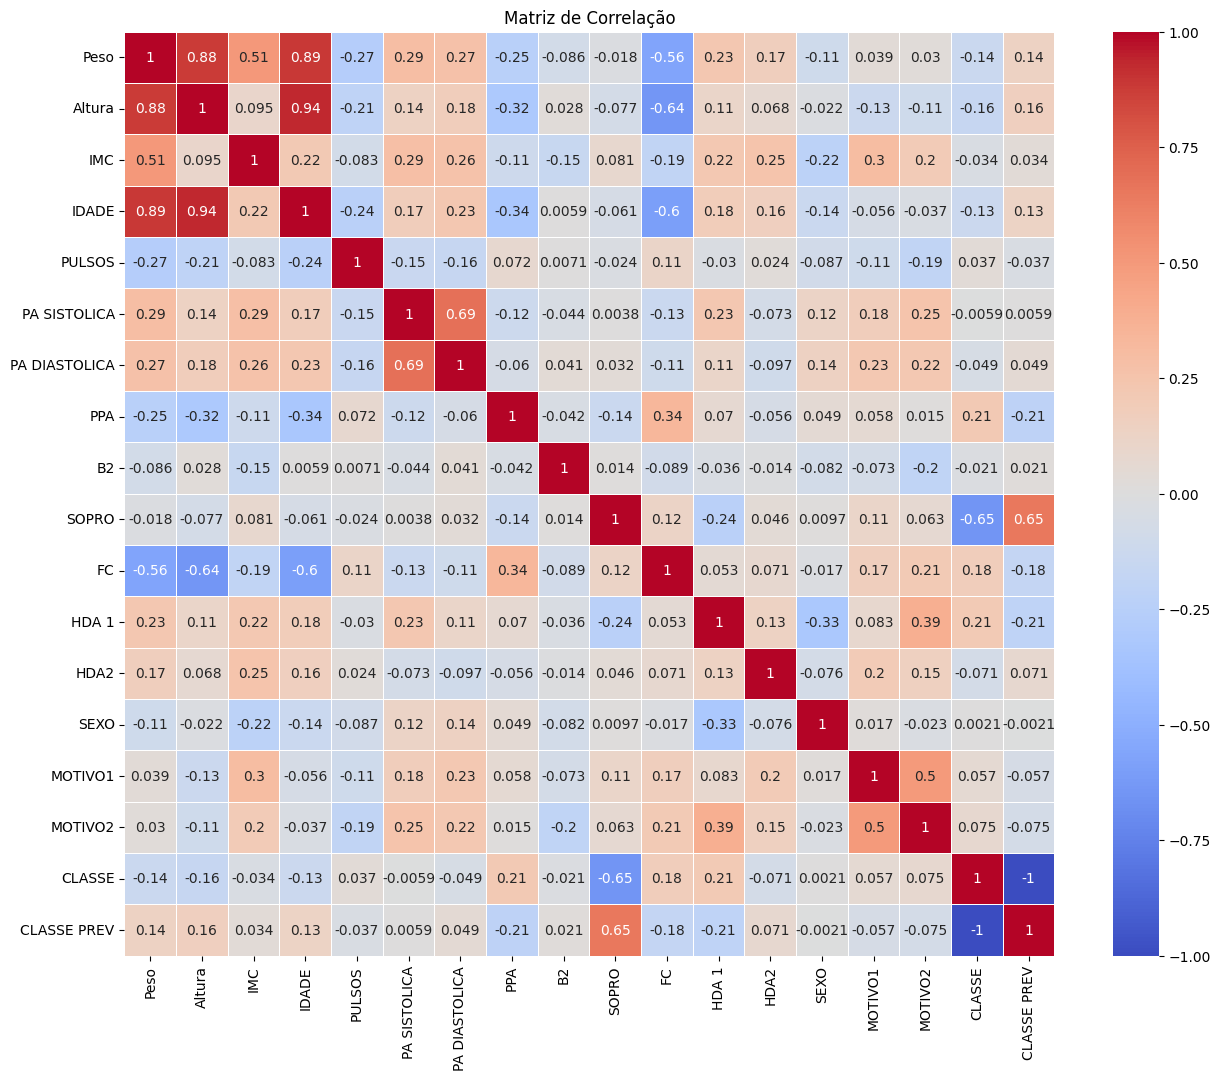

In [ ]:
plotar_correlacao(dados_errados)

In [330]:
for col, encoder in encoders_train.items():
    print(f"Coluna: {col}")
    # O mapeamento entre as categorias e os números atribuídos
    mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
    print(mapping)
    print("-" * 30)

Coluna: PULSOS
{'Amplos': np.int64(0), 'Femorais diminuidos': np.int64(1), 'Normais': np.int64(2), 'Outro': np.int64(3)}
------------------------------
Coluna: PPA
{'HAS-1 PAD': np.int64(0), 'HAS-1 PAS': np.int64(1), 'HAS-2 PAD': np.int64(2), 'HAS-2 PAS': np.int64(3), 'Normal': np.int64(4), 'Não Calculado': np.int64(5), 'Pre-Hipertensão PAD': np.int64(6), 'Pre-Hipertensão PAS': np.int64(7)}
------------------------------
Coluna: B2
{'Desdob fixo': np.int64(0), 'Hiperfonética': np.int64(1), 'Normal': np.int64(2), 'Outro': np.int64(3), 'Única': np.int64(4)}
------------------------------
Coluna: SOPRO
{'Contínuo': np.int64(0), 'Sistólico': np.int64(1), 'ausente': np.int64(2), 'diastólico': np.int64(3)}
------------------------------
Coluna: HDA 1
{'Assintomático': np.int64(0), 'Cianose': np.int64(1), 'Desmaio/tontura': np.int64(2), 'Dispneia': np.int64(3), 'Dor precordial': np.int64(4), 'Ganho de peso': np.int64(5), 'Outro': np.int64(6), 'Palpitacao': np.int64(7)}
-----------------------

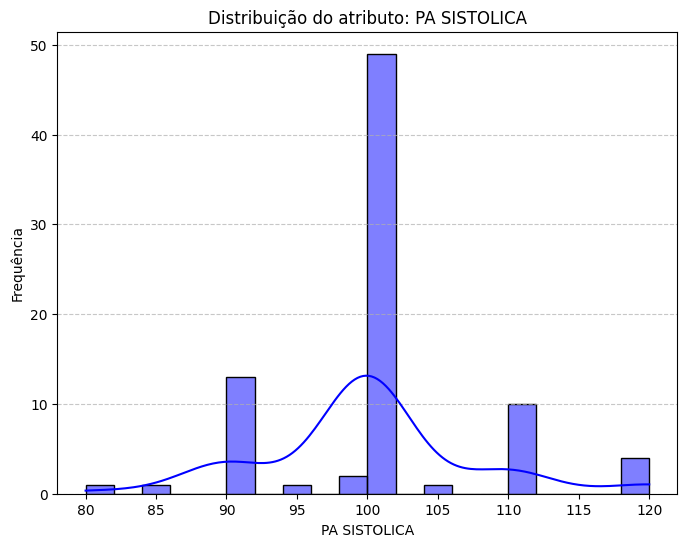

In [329]:
plot_hist(dados_errados, "PA ")

In [208]:
colunas = dados_errados.columns


for col in encoders_train:
    dados_errados[col] = encoders_train[col].inverse_transform(
        dados_errados[col].astype(int)
    )

In [209]:
dados_errados["CLASSE PREV"] = dados_errados["CLASSE PREV"].replace(
    {0: "Anormal", 1: "Normal"}
)

In [210]:
dados_errados.head(5)

,Peso,Altura,IMC,IDADE,PULSOS,PA SISTOLICA,PA DIASTOLICA,PPA,B2,SOPRO,FC,HDA 1,HDA2,SEXO,MOTIVO1,MOTIVO2,CLASSE,CLASSE PREV
828,14.0,105.0,12.698413,4.06,Normais,100.0,50.0,Normal,Normal,ausente,120.0,Palpitacao,Assintomático,M,1 - Cardiopatia já estabelecida,6 - Palpitação/taquicardia/arritmia,Anormal,Normal
730,25.0,133.0,14.133077,1.95,Normais,90.0,55.0,Não Calculado,Normal,ausente,90.0,Assintomático,Assintomático,M,5 - Parecer cardiológico,5 - Atividade física,Anormal,Normal
472,27.0,130.0,15.976331,10.01,Normais,100.0,70.0,Normal,Normal,ausente,90.0,Assintomático,Assintomático,M,5 - Parecer cardiológico,5 - Atividade física,Anormal,Normal
2018,10.6,83.0,15.386849,2.27,Normais,100.0,60.0,Não Calculado,Normal,ausente,100.0,Palpitacao,Assintomático,F,6 - Suspeita de cardiopatia,6 - Palpitação/taquicardia/arritmia,Anormal,Normal
4147,6.7,62.0,17.429761,0.41,Normais,100.0,60.0,Não Calculado,Normal,ausente,120.0,Assintomático,Assintomático,M,5 - Parecer cardiológico,5 - Cirurgia,Normal,Anormal


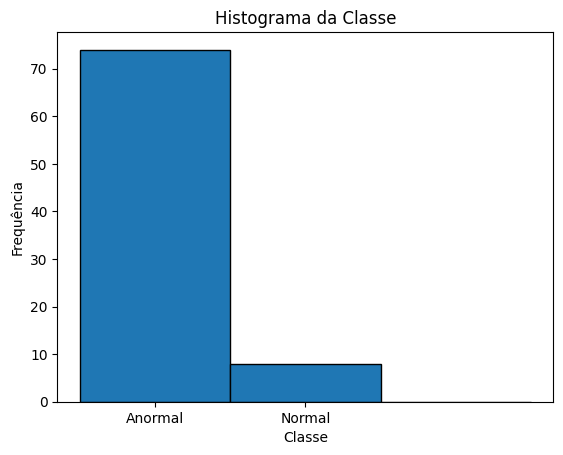

In [211]:
plt.hist(
    dados_errados["CLASSE"], bins=[-0.5, 0.5, 1.5, 2.5], edgecolor="black"
)  # Dividindo em 3 bins
plt.title("Histograma da Classe")
plt.xlabel("Classe")
plt.ylabel("Frequência")
plt.xticks([0, 1])  # Apenas 0 e 1 no eixo x
plt.show()

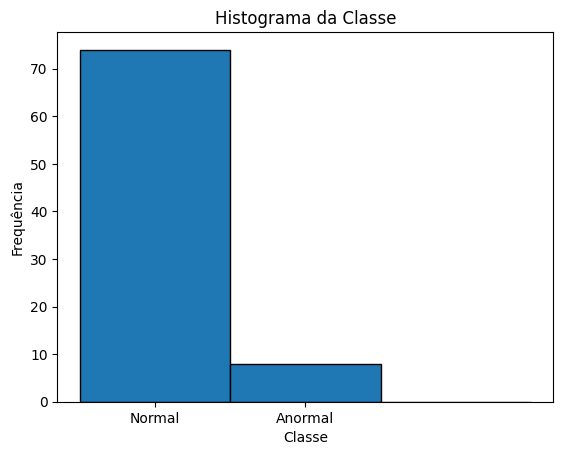

In [212]:
plt.hist(
    dados_errados["CLASSE PREV"], bins=[-0.5, 0.5, 1.5, 2.5], edgecolor="black"
)  # Dividindo em 3 bins
plt.title("Histograma da Classe")
plt.xlabel("Classe")
plt.ylabel("Frequência")
plt.xticks([0, 1])  # Apenas 0 e 1 no eixo x
plt.show()

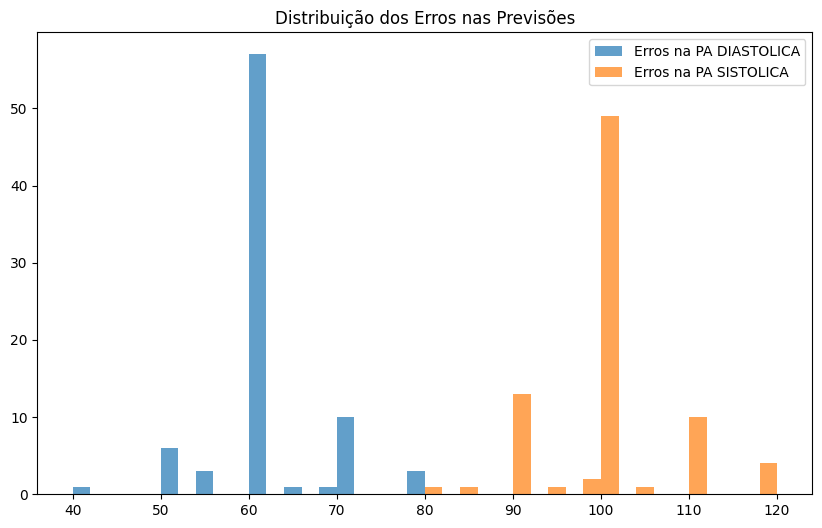

In [213]:
import matplotlib.pyplot as plt

# Filtrando os dados errados
erros = dados_errados[dados_errados["CLASSE PREV"] != dados_errados["CLASSE"]]

# Plotando a distribuição dos erros em um gráfico
plt.figure(figsize=(10, 6))
plt.hist(erros["PA DIASTOLICA"], bins=20, alpha=0.7, label="Erros na PA DIASTOLICA")
plt.hist(erros["PA SISTOLICA"], bins=20, alpha=0.7, label="Erros na PA SISTOLICA")
plt.legend()
plt.title("Distribuição dos Erros nas Previsões")
plt.show()